# matplotlibの基本

matplotlibはPythonで最も有名な描画ライブラリで、MATLABに似た描画関数のセットを提供しており、短いスクリプトを書いて素早くグラフを描くのに適しています。matplotlibのドキュメントは非常に充実しており、その展示ページには数百のグラフのサムネイルとそのソースコードが掲載されています。そのため、ある種のグラフを描画する必要がある場合、https://matplotlib.org/stable/gallery/index で「閲覧/コピー/貼り付け」を行うだけで、ほとんどの場合迅速に解決できます。

この章では、matplotlibの迅速な描画機能を簡単に紹介した後、いくつかの実例を深く掘り下げ、読者がmatplotlibの描画の基本的な概念を学び理解できるようにします。この章の内容を理解した後、公式のドキュメントとデモプログラムを使用してmatplotlibでデータを完璧に表示できるようになるはずです。

In [1]:
import helper.magics
import numpy as np
from matplotlib import pyplot as plt

## 描画の基本

matplotlibはオブジェクト指向の技術を使用して実装されているため、グラフを構成する各要素はオブジェクトです。大きなアプリケーションを書く際には、オブジェクト指向の方法でmatplotlibを使用する方がより効果的です。しかし、このオブジェクト指向の呼び出しインターフェースを使用してグラフを描画するのは煩雑であるため、matplotlibは迅速な描画のための`pyplot`モジュールも提供しています。このセクションではまずこのモジュールの使用方法を紹介します。

matplotlibで描画したグラフをNotebookに埋め込むためには、次のコマンドを実行する必要があります：

In [2]:
%matplotlib inline

`inline`モードを使用してNotebookで描画したグラフは自動的に閉じられます。Notebook内の複数のセルで同じグラフを操作するためには、次の魔法のコマンドを実行する必要があります：

In [3]:
%config InlineBackend.close_figures = False

### pyplotモジュールを使用した描画

matplotlibの`pyplot`モジュールは、MATLABに似た描画関数の呼び出しインターフェースを提供しており、ユーザーが迅速に2次元グラフを描画できるようにします。まず簡単な例を見てみましょう：

:::{admonition} `pylab`モジュール
:class: note
matplotlibは`pylab`というモジュールも提供しており、NumPyと`pyplot`モジュールの多くの一般的な関数を含んでいます。これにより、ユーザーは迅速に計算と描画を行うことができ、IPythonのインタラクティブ環境で使用するのに非常に適しています。本書では`import pylab as pl`を使用して`pylab`モジュールを読み込んでいます。
:::

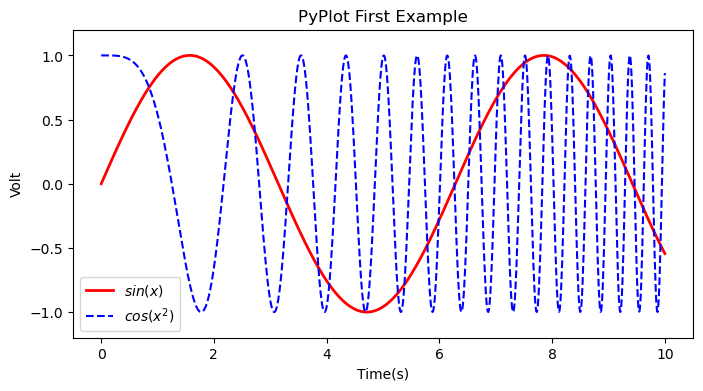

In [4]:
import matplotlib.pyplot as plt  #❶

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8, 4))  #❷

plt.plot(x, y, label="$sin(x)$", color="red", linewidth=2)  #❸
plt.plot(x, z, "b--", label="$cos(x^2)$")  #❹

plt.xlabel("Time(s)")  #❺
plt.ylabel("Volt")
plt.title("PyPlot First Example")
plt.ylim(-1.2, 1.2)
plt.legend()

plt.show()  #❻

プログラムの出力は上のグラフのようになります。❶まずmatplotlibの描画モジュール`pyplot`を読み込み、`plt`という名前で再命名します。❷`figure()`を呼び出して`Figure`（グラフ）オブジェクトを作成し、それを現在の`Figure`オブジェクトにします。`Figure`オブジェクトを作成せずに直接`plot()`を呼び出して描画することもできますが、その場合matplotlibは自動的に`Figure`オブジェクトを作成します。`figsize`パラメータは`Figure`オブジェクトの幅と高さを指定し、その単位はインチです。また、`dpi`パラメータを使用して`Figure`オブジェクトの解像度、つまり1インチあたりのピクセル数を指定することもできます。ここではデフォルト値の80を使用しています。したがって、この例で作成された`Figure`オブジェクトの幅は`8*80 = 640`ピクセルです。

❸`Figure`オブジェクトを作成した後、`plot()`を呼び出して現在の`Figure`オブジェクトに描画します。実際には`plot()`は`Axes`（サブプロット）オブジェクトに描画します。現在の`Figure`オブジェクトに`Axes`オブジェクトがない場合、ほぼグラフ全体を埋める`Axes`オブジェクトが作成され、それが現在の`Axes`オブジェクトになります。`plot()`の最初の2つのパラメータは、それぞれX軸とY軸のデータを表すオブジェクトで、ここではNumPy配列を使用しています。キーワード引数を使用して、描画する曲線のさまざまな属性を指定できます：
    
* `label`：曲線にラベルを指定します。このラベルは凡例に表示されます。ラベル文字列の前後に`'$'`文字がある場合、matplotlibはその内蔵のLaTeXエンジンを使用してそれを数式として表示します。

* `color`：曲線の色を指定します。色は英単語または`'#'`で始まる6桁の16進数で指定できます。例えば、`'#ff0000'`は赤を表します。または、0から1の範囲の3つの要素のタプルを使用して指定することもできます。例えば、`(1.0, 0.0, 0.0)`も赤を表します。

* `linewidth`：曲線の幅を指定します。整数でなくてもよく、省略形のパラメータ名`lw`を使用することもできます。

:::{warning}
LaTeX構文を使用して数式を描画すると、グラフの描画速度が大幅に低下します。
:::

❹3番目のパラメータ`'b--'`を使用して、曲線の色と線種を直接指定します。これは、いくつかの覚えやすい記号を使用して曲線のスタイルを指定します。`'b'`は青色を、`'--'`は破線を表します。IPythonで`plt.plot?`と入力すると、フォーマット文字列と各パラメータの詳細な説明を確認できます。

❺次に、一連の関数を使用して現在の`Axes`オブジェクトのさまざまな属性を設定します：

* `xlabel`、`ylabel`：それぞれX軸とY軸のタイトルテキストを設定します。

* `title`：サブプロットのタイトルを設定します。

* `xlim`、`ylim`：それぞれX軸とY軸の表示範囲を設定します。

* `legend`：凡例を表示します。これは、グラフ内の各曲線のラベル（label）とスタイルを表す矩形領域です。

❻最後に`plt.show()`を呼び出して描画ウィンドウを表示します。Notebookではこのステップを省略できます。通常の実行環境では、`show()`はユーザーが描画ウィンドウを閉じるまでプログラムの実行をブロックします。

また、`plt.savefig()`を呼び出して現在の`Figure`オブジェクトを画像ファイルとして保存することもできます。画像の形式は画像ファイルの拡張子によって決定されます。次のプログラムは現在のグラフを`test.png`として保存し、`dpi`パラメータを使用して画像の解像度を120に指定します。したがって、出力画像の幅は`8*120 = 960`ピクセルになります。

In [5]:
plt.savefig("test.png", dpi=120)

:::{tip}
グラフウィンドウを閉じた場合、`savefig()`を使用して画像を保存することはできません。実際には`show()`を呼び出してグラフを表示する必要はなく、直接`savefig()`を使用してグラフを画像ファイルとして保存できます。この方法を使用すると、グラフをバッチ出力するプログラムを簡単に作成できます。
:::

`savefig()`の最初のパラメータはファイル名でも、Pythonのファイルオブジェクトと同じ呼び出しインターフェースを持つオブジェクトでもかまいません。例えば、画像を`io.BytesIO`オブジェクトに保存すると、画像内容を表す文字列を取得できます。この場合、`format`パラメータを使用して保存する画像形式を指定する必要があります。

In [6]:
import io

buf = io.BytesIO()  # 画像内容を保存するためのBytesIOオブジェクトを作成
plt.savefig(buf, format="png")  # 画像をpng形式でbufに保存
buf.getvalue()[:20]  # 画像内容の最初の20バイトを表示

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 '

### オブジェクト指向方式での描画

matplotlibは実際にはオブジェクト指向の描画ライブラリで、描画するグラフの各要素（線、テキスト、目盛りなど）はメモリ内に対応するオブジェクトを持っています。迅速な描画を容易にするため、matplotlibは`pyplot`モジュールを通じてMATLABに似た描画APIを提供し、多くの描画オブジェクトで構成される複雑な構造をこのAPI内部に隠しています。`pyplot`モジュールが提供する関数を呼び出すだけで、迅速な描画とグラフのさまざまな詳細設定を実現できます。`pyplot`モジュールは使い方が簡単ですが、大きなアプリケーションで使用するには適していないため、この章ではmatplotlibのオブジェクト指向方式を使用して描画プログラムを作成する方法を重点的に紹介します。

オブジェクト指向の描画ライブラリを関数のみを使用するAPIにラップするため、`pyplot`モジュールの内部には現在のグラフと現在のサブプロットなどの情報が保存されています。`gcf()`と`gca()`を使用してこれらのオブジェクトを取得できます。これらはそれぞれ「Get Current Figure」と「Get Current Axes」の頭文字を取ったものです。`gcf()`はグラフを表す`Figure`オブジェクトを取得し、`gca()`はサブプロットを表す`Axes`オブジェクトを取得します。

In [7]:
fig = plt.gcf()
axes = plt.gca()
print(fig, axes)

Figure(800x400) Axes(0.125,0.11;0.775x0.77)


`pyplot`モジュールでは、多くの関数が現在の`Figure`または`Axes`オブジェクトを処理します。例えば、前述の`plot()`、`xlabel()`、`savefig()`などです。IPythonで関数名に"??"を付けて入力すると、これらの関数のソースコードを確認し、さまざまなオブジェクトのメソッドを呼び出して描画処理を行う方法を理解できます。例えば、次の例では`plot()`関数のソースコードを確認し、`plot()`関数が実際には`gca()`を使用して現在の`Axes`オブジェクト`ax`を取得し、その`plot()`メソッドを呼び出して実際の描画を行うことがわかります。読者は同様の方法で`pyplot`モジュールの他の関数がさまざまな描画オブジェクトをどのようにラップしているかを確認してください。

```python
def plot(*args, **kwargs):
    ax = gca()
    ...
    try:
        ret = ax.plot(*args, **kwargs)
        ...
    finally:
        ax.hold(washold)
```

### 属性の設定

matplotlibで描画するグラフの各コンポーネントはオブジェクトに対応しており、これらのオブジェクトの属性設定メソッド`set_*()`または`pyplot`モジュールの属性設定関数`setp()`を呼び出してそれらの属性値を設定できます。例えば、`plot()`は`Line2D`型の要素のリストを返します。次の例では`Line2D`オブジェクトの属性を設定します：

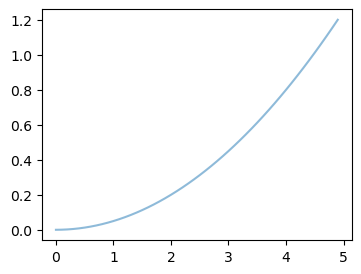

In [8]:
fig = plt.figure(figsize=(4, 3))
x = np.arange(0, 5, 0.1)
line = plt.plot(x, 0.05 * x * x)[0]  # plotはリストを返す
line.set_alpha(0.5)  # Line2Dオブジェクトのset_*()メソッドを呼び出して属性値を設定

上の例では、`Line2D`オブジェクトの`set_alpha()`を呼び出して、グラフ内の対応する曲線の透明度を変更します。次の文は正弦波と余弦波の2つの曲線を同時に描画し、`lines`は2つの`Line2D`オブジェクトのリストです：

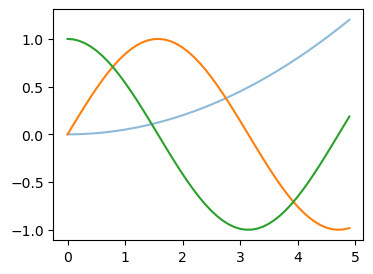

In [9]:
lines = plt.plot(x, np.sin(x), x, np.cos(x))
fig

`setp()`を呼び出すと、複数のオブジェクトの属性を同時に設定できます。ここでは2つの曲線の色と線幅を同時に設定します：

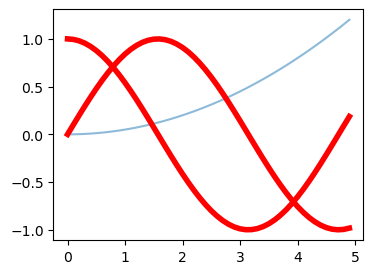

In [10]:
plt.setp(lines, color="r", linewidth=4.0)
fig

同様に、`Line2D`オブジェクトの`get_*()`または`plt.getp()`を呼び出してオブジェクトの属性値を取得できます：

In [11]:
print(line.get_linewidth())
print(plt.getp(lines[0], "color"))  # color属性を返す

1.5
r


`getp()`と`setp()`は異なり、`getp()`は1つのオブジェクトに対してのみ操作できます。次の2つの使用方法があります：

* 属性名を指定：オブジェクトの特定の属性の値を返します

* 属性名を指定しない：オブジェクトのすべての属性と値を出力します

次の例では`getp()`を使用して`Figure`オブジェクトの属性を確認します：

In [12]:
plt.getp(fig)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<Axes: >]
    children = [<matplotlib.patches.Rectangle object at 0x0000020...
    clip_box = None
    clip_on = True
    clip_path = None
    constrained_layout = False
    constrained_layout_pads = (None, None, None, None)
    default_bbox_extra_artists = [<Axes: >, <matplotlib.spines.Spine object at 0x00...
    dpi = 100.0
    edgecolor = (1.0, 1.0, 1.0, 1.0)
    facecolor = (1.0, 1.0, 1.0, 1.0)
    figheight = 3.0
    figure = Figure(400x300)
    figwidth = 4.0
    frameon = True
    gid = None
    in_layout = True
    label = 
    layout_engine = None
    linewidth = 0.0
    mouseover = False
    path_effects = []
    picker = None
    rasterized = False
    size_inches = [4. 3.]
    sketch_params = None
    snap = None
    suptitle = 
    supxlabel = 
    supylabel = 
    tight_layout = False
    tightbbox = TransformedBbox(     Bbox(x0=6.527777777777779, y0...
    transform = IdentityTransform()
    transfor

`Figure`オブジェクトの`axes`属性はリストで、グラフ内のすべてのサブプロットオブジェクトを保持します。次のプログラムは現在のグラフの`axes`属性を確認します。これは`gca()`が取得する現在のサブプロットオブジェクトです：

In [13]:
print(plt.getp(fig, "axes"), plt.getp(fig, "axes")[0] is plt.gca())

[<Axes: >] True


`plt.getp()`を使用して`AxesSubplot`オブジェクトの属性をさらに取得できます。例えば、その`lines`属性はサブプロット内の`Line2D`オブジェクトのリストです：

In [14]:
alllines = plt.getp(plt.gca(), "lines")
print(alllines, alllines[0] is line)  # 最初に描画した曲線が最初の要素

<a list of 3 Line2D objects> True


この方法を使用すると、オブジェクトの属性値と各オブジェクト間の関係を簡単に確認し、設定する必要のある属性を見つけることができます。matplotlibは実際にはオブジェクト指向の描画ライブラリであるため、オブジェクトの属性を直接取得することもできます。例えば：

In [15]:
print(fig.axes, len(fig.axes[0].lines))

[<Axes: >] 3


### 複数のサブプロットの描画

`Figure`オブジェクトは複数のサブプロット（`Axes`）を含むことができます。matplotlibでは、`Axes`オブジェクトが描画領域を表し、本書ではこれをサブプロットと呼びます。前の例では、`Figure`オブジェクトは1つのサブプロットのみを含んでいました。`subplot()`を使用して、複数のサブプロットを含むグラフを簡単に描画できます。その呼び出し形式は以下の通りです：

    subplot(numRows, numCols, plotNum)

グラフの描画領域全体が`numRows`行と`numCols`列に等分割され、上から下、左から右の順に各領域に番号が付けられます。左上の領域の番号は1です。`plotNum`パラメータは、作成する`Axes`オブジェクトの領域を指定します。`numRows`、`numCols`、`plotNum`の3つのパラメータがすべて10未満の場合、それらを1つの整数に省略できます。例えば、`subplot(323)`と`subplot(3,2,3)`は同じ意味です。新しく作成されたサブプロットが以前に作成されたサブプロットの領域と重なる場合、以前のサブプロットは削除されます。

以下のプログラムは、次のグラフに示す3行2列の6つのサブプロットを作成し、`facecolor`パラメータを使用して各サブプロットに異なる背景色を設定します。

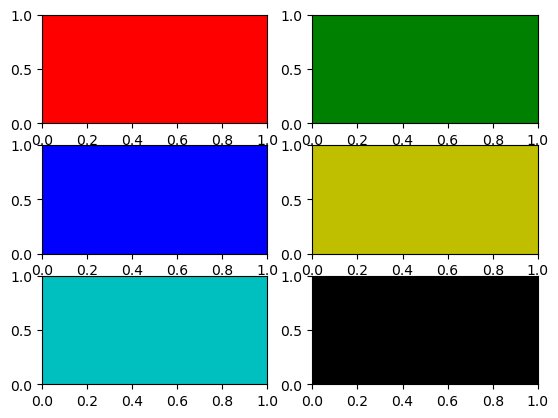

In [16]:
fig = plt.figure()
for idx, color in enumerate("rgbyck"):
    plt.subplot(321 + idx, facecolor=color)

特定のサブプロットを行全体または列全体に広げたい場合は、以下のように`subplot()`を呼び出します。プログラムの出力は次のグラフに示されています。

<Axes: >

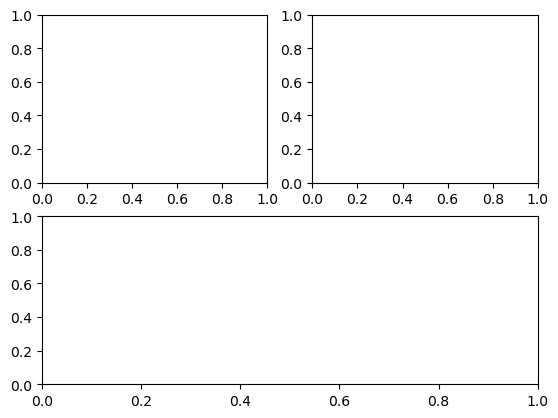

In [17]:
plt.figure()
plt.subplot(221)  # 1行目の左図
plt.subplot(222)  # 1行目の右図
plt.subplot(212)  # 2行目全体

描画ウィンドウのツールバーには、「Configure Subplots」というボタンがあります。これをクリックすると、サブプロット間の間隔やグラフの枠との距離を調整するダイアログが表示されます。プログラム内で`subplots_adjust()`を呼び出してこれらのパラメータを調整することもできます。`subplots_adjust()`には`left`、`right`、`bottom`、`top`、`wspace`、`hspace`の6つのパラメータがあり、これらはダイアログ内の各コントロールに対応しています。パラメータの値は0から1の範囲で、グラフの描画領域の幅と高さで正規化された座標または長さです。

`subplot()`は作成した`Axes`オブジェクトを返します。これらのオブジェクトを変数に保存し、`sca()`を使用してそれらを現在の`Axes`オブジェクトに切り替え、`plot()`を呼び出してその中に描画することができます。複数のグラフを同時に描画する必要がある場合、`figure()`に整数パラメータを渡して`Figure`オブジェクトの番号を指定できます。指定された番号の`Figure`オブジェクトが既に存在する場合、新しいオブジェクトは作成されず、代わりにそれが現在の`Figure`オブジェクトになります。以下のプログラムは、異なるグラフの異なるサブプロットに順番に曲線を描画する方法を示しています。

In [18]:
plt.close("all")

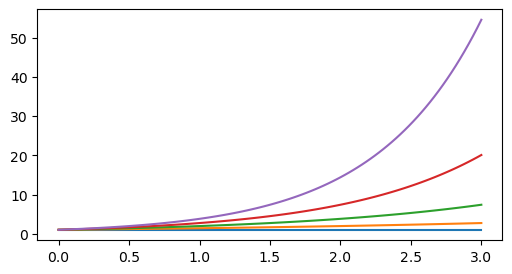

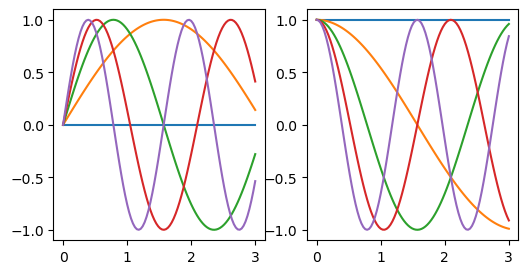

In [19]:
plt.figure(1, figsize=(6, 3))  # グラフ1を作成
plt.figure(2, figsize=(6, 3))  # グラフ2を作成
ax1 = plt.subplot(121)  # グラフ2にサブプロット1を作成
ax2 = plt.subplot(122)  # グラフ2にサブプロット2を作成

x = np.linspace(0, 3, 100)
for i in range(5):
    plt.figure(1)  #❶ グラフ1を選択
    plt.plot(x, np.exp(i * x / 3))
    plt.sca(ax1)  #❷ グラフ2のサブプロット1を選択
    plt.plot(x, np.sin(i * x))
    plt.sca(ax2)  # グラフ2のサブプロット2を選択
    plt.plot(x, np.cos(i * x))

:::{tip}
`sca()`を呼び出さずに、直接`ax1`と`ax2`の`plot()`メソッドを呼び出して描画することもできます。
:::

まず、`figure()`を使用して2つのグラフを作成し、それぞれ1と2の番号を付けます。次に、グラフ2に左右に並んだ2つのサブプロットを作成し、変数`ax1`と`ax2`に保存します。

ループ内で、❶まず`figure(1)`を呼び出してグラフ1を現在のグラフにし、その中に描画します。❷次に`sca(ax1)`と`sca(ax2)`を呼び出して、サブプロット`ax1`と`ax2`を現在のサブプロットにし、その中に描画します。これらが現在のサブプロットになると、それらを含むグラフ2も自動的に現在のグラフになるため、`figure(2)`を呼び出す必要はありません。このようにして、グラフ1とグラフ2の2つのサブプロット間を切り替え、順番に新しい曲線を追加します。その効果は上のグラフに示されています。

さらに、`subplots()`を使用して複数のサブプロットを一度に生成し、グラフオブジェクトとサブプロットオブジェクトの配列を返すことができます。以下の例では、`axes`は形状が`(2, 3)`の配列で、各要素がサブプロットオブジェクトです。Pythonの代入機能を使用して、この配列の各要素を変数で表すことができます：

In [20]:
fig, axes = plt.subplots(2, 3)
[a, b, c], [d, e, f] = axes
print(axes.shape)
print(b)
plt.close(fig)

(2, 3)
Axes(0.398529,0.53;0.227941x0.35)


さらに、`subplot2grid()`を呼び出して、より複雑なテーブルレイアウトを作成することもできます。テーブルレイアウトは、ExcelやWordでテーブルを作成するのと非常に似ています。その呼び出しパラメータは以下の通りです：

```python
subplot2grid(shape, loc, rowspan=1, colspan=1, **kwargs)
```

ここで、`shape`はテーブルの形状を表すタプルです：（行数, 列数）；`loc`はサブプロットの左上隅の座標です：（行, 列）；`rowspan`と`colspan`は、サブプロットが占める行数と列数です。以下の例では、$3\times 3$のグリッド上に5つのサブプロットを作成し、各サブプロットの中央にそのサブプロットに対応する変数名を表示します：

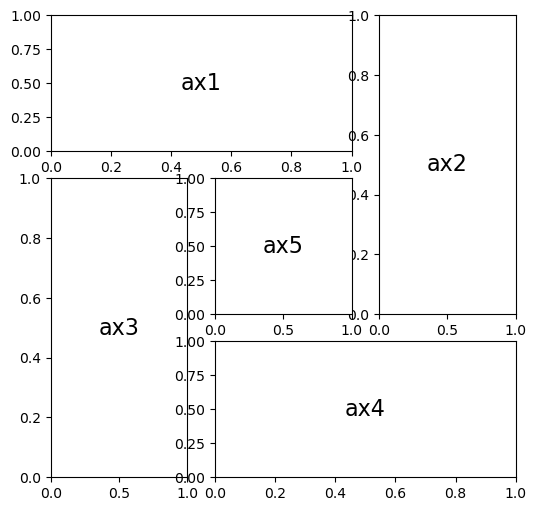

In [21]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
ax5 = plt.subplot2grid((3, 3), (1, 1))

for idx, ax in enumerate(fig.axes, 1):
    ax.text(0.5, 0.5, "ax{}".format(idx), ha="center", va="center", fontsize=16)

### 設定ファイル

グラフを描画するには、多くのオブジェクトの属性を設定する必要があります。例えば、色、フォント、線の種類などです。前の描画プログラムでは、これらの属性を一つずつ設定するのではなく、matplotlibのデフォルト設定を直接使用していました。matplotlibはこれらのデフォルト設定を`matplotlibrc`という設定ファイルに保存しています。設定ファイルを変更することで、グラフのデフォルトスタイルを変更できます。

matplotlibでは、複数の`matplotlibrc`設定ファイルを使用できます。それらの検索順序は以下の通りで、順序が前の設定ファイルが優先されます。

* 現在のパス：プログラムの現在のパス。

* ユーザー設定パス：通常、ユーザーフォルダの`.matplotlib`ディレクトリにあります。環境変数`MATPLOTLIBRC`を使用してその場所を変更できます。

* システム設定パス：matplotlibのインストールディレクトリの`mpl-data`に保存されています。

以下の文を使用して、ユーザー設定パスを取得できます：

In [22]:
import matplotlib

matplotlib.get_configdir()

'C:\\Users\\ruoyu\\.matplotlib'

以下の文を使用して、現在使用されている設定ファイルのパスを取得できます：

In [23]:
matplotlib.matplotlib_fname()

'C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

テキストエディタでこの設定ファイルを開くと、実際には辞書であることがわかります。多くの設定を区別するために、辞書のキーは設定の種類に応じて「.」で区切られています。設定ファイルの読み込みには`rc_params()`を使用でき、設定辞書を返します：

In [24]:
%omit print(matplotlib.rc_params())

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
...

`matplotlib`モジュールがロードされるときに`rc_params()`が呼び出され、得られた設定辞書が`rcParams`変数に保存されます：

In [25]:
%omit print(matplotlib.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
...

In [26]:
plt.close("all")

matplotlibは`rcParams`辞書の設定を使用してグラフを描画します。ユーザーはこの辞書の設定を直接変更でき、その変更はその後作成される描画要素に反映されます。例えば、以下のスクリプトで描画される折れ線グラフには円形のマーカーが付きます：

```python
matplotlib.rcParams["lines.marker"] = "o"
plt.plot([1,2,3,2])
```

設定辞書を簡単に設定するために、`rc()`を使用できます。以下の例では、マーカー、線の幅、色を同時に設定しています：

```python
matplotlib.rc("lines", marker="x", linewidth=2, color="red")
```

matplotlibがロードされたときに設定ファイルから読み込まれたデフォルト設定に戻したい場合は、`rcdefaults()`を呼び出します。

```python
matplotlib.rcdefaults()
```

設定ファイルを手動で変更し、最新の設定を設定ファイルから再読み込みしたい場合は、以下のように呼び出します：

```python
matplotlib.rcParams.update( matplotlib.rc_params() )
```

:::{tip}
`pyplot`モジュールを使用して、`rcParams`、`rc`、`rcdefaults`を使用することもできます。
:::

`matplotlib.style`モジュールは、描画スタイルの切り替え機能を提供します。すべての利用可能なスタイルは`available`で取得できます：

In [27]:
from matplotlib import style

print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


`use()`関数を呼び出してスタイルを切り替えることができます。例えば、以下のように`ggplot`スタイルを使用してグラフを描画します。その効果は次のグラフに示されています。

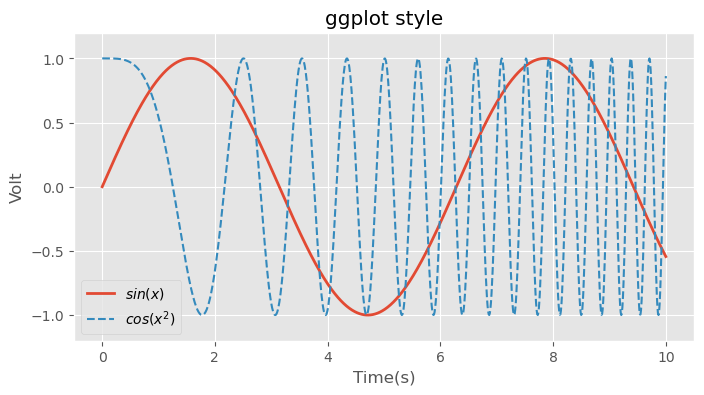

In [28]:
import numpy as np
import matplotlib.pyplot as plt

style.use("ggplot")

plt.close("all")

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8, 4))

plt.plot(x, y, label="$sin(x)$", linewidth=2)
plt.plot(x, z, "--", label="$cos(x^2)$")

plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("ggplot style")
plt.ylim(-1.2, 1.2)
plt.legend();

### グラフに日本語を表示する

matplotlibのデフォルト設定ファイルで使用されているフォントは、日本語を正しく表示できません。以下の方法で日本語フォントを設定できます：

1. プログラム内で直接フォントを指定する。

2. プログラムの冒頭で設定辞書`rcParams`を変更する。

3. 設定ファイルを変更する。

matplotlibでは、フォント名を使用してフォントを指定できます。各フォント名はフォントファイルに対応しています。以下のプログラムを使用して、利用可能なすべてのフォントのリストを取得できます：

In [29]:
from matplotlib.font_manager import fontManager

fontManager.ttflist[:6]

[FontEntry(fname='C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable'),
 FontEntry(fname='C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='C:\\pyenv313\\envs\\py\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono

`ttflist`はmatplotlibのシステムフォントリストです。各要素はフォントを表す`Font`オブジェクトです。以下のプログラムは、最初のフォントファイルのフルパスとフォント名を表示します。パスから、それがmatplotlibに付属のフォントであることがわかります。

In [30]:
print(fontManager.ttflist[0].name)
print(fontManager.ttflist[0].fname)

cmtt10
C:\pyenv313\envs\py\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmtt10.ttf


以下のプログラムは、フォントリスト内のフォントを使用して日本語のテキストを表示します。その効果は次のグラフに示されています。

In [31]:
plt.close("all")

C:\pyenv313\envs\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) STXingkai.
  fig.canvas.print_figure(bytes_io, **kw)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Ebrima.
  fig.canvas.print_figure(bytes_io, **kw)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Ebrima.
  fig.canvas.print_figure(bytes_io, **kw)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) Ebrima.
  fig.canvas.print_figure(bytes_io, **kw)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) Ebrima.
  fig.canvas.print_figure(bytes_io, **kw)
C:\pyenv31

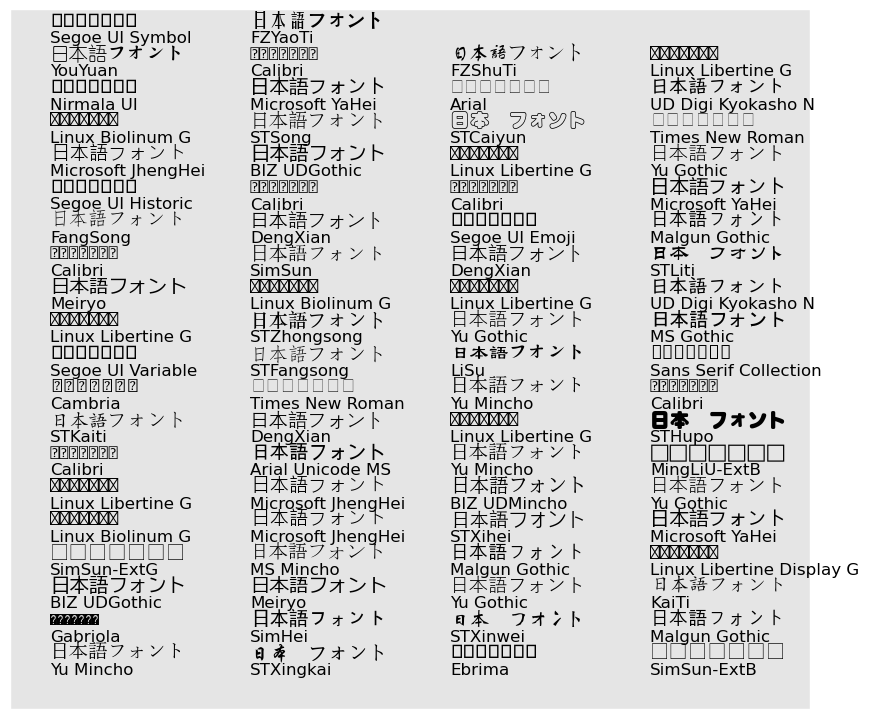

C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) STXingkai.
  func(*args, **kwargs)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Ebrima.
  func(*args, **kwargs)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Ebrima.
  func(*args, **kwargs)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) Ebrima.
  func(*args, **kwargs)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) Ebrima.
  func(*args, **kwargs)
C:\pyenv313\envs\py\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12457 (\N{KATAKANA LETTER SMALL O}) missi

In [32]:
# %fig=システム内のすべての日本語フォント名を表示
import os
from os import path

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.05
fonts = [
    font.name
    for font in fontManager.ttflist
    if path.exists(font.fname) and os.stat(font.fname).st_size > 1e6
]  #❶
font = set(fonts)
dy = (1.0 - y) / (len(fonts) // 4 + (len(fonts) % 4 != 0))

for font in fonts:
    t = ax.text(
        x,
        y + dy / 2,
        "日本語フォント",
        {"fontname": font, "fontsize": 14},
        transform=ax.transAxes,
    )  #❷
    ax.text(x, y, font, {"fontsize": 12}, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

❶osモジュールの`stat()`を使用してフォントファイルのサイズを取得し、フォントリスト内の1Mバイト以上のフォントファイルをすべて保持します。日本語フォントファイルは通常非常に大きいため、この方法を使用してすべての日本語フォントファイルを大まかに見つけることができます。

❷サブプロットオブジェクトの`text()`を呼び出してテキストを追加します。テキストはUnicode文字列でなければなりません。フォントを指定するために、フォントを記述する辞書を使用します：`'fontname'`キーに対応する値がフォント名です。

matplotlibはTTFフォントファイルのみを検索するため、システムにインストールされている多くの複合TTCフォントファイルを上記の方法で使用することはできません。フォントファイルを使用して`FontProperties`オブジェクトを作成し、このオブジェクトを使用してグラフ内の各種テキストのフォントを指定できます。以下はその例です：

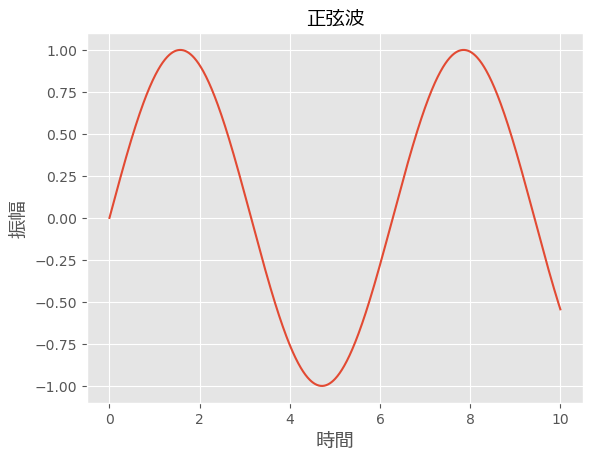

In [33]:
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r"c:\windows\fonts\meiryo.ttc", size=14)  #❶
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.close("all")
plt.plot(t, y)
plt.xlabel("時間", fontproperties=font)  #❷
plt.ylabel("振幅", fontproperties=font)
plt.title("正弦波", fontproperties=font)
plt.show()

❶フォントの属性を記述する`FontProperties`オブジェクトを作成し、その`fname`属性をフォントファイルの絶対パスに設定します。❷`fontproperties`パラメータを通じて`FontProperties`オブジェクトをテキスト表示関数に渡します。

また、フォントツールを使用してTTCフォントファイルを複数のTTFフォントファイルに分解し、それらをシステムのフォントフォルダにコピーすることもできます。起動時間を短縮するため、matplotlibは起動時にすべてのフォントファイルを再スキャンしてフォントリストを作成しません。そのため、フォントファイルをコピーした後、設定フォルダ下の`fontlist-*.json`ファイルを削除してください。

また、設定辞書を直接変更してデフォルトのフォントを設定することもできます。これにより、テキストを描画するたびにフォントを設定する必要がなくなります。例えば：

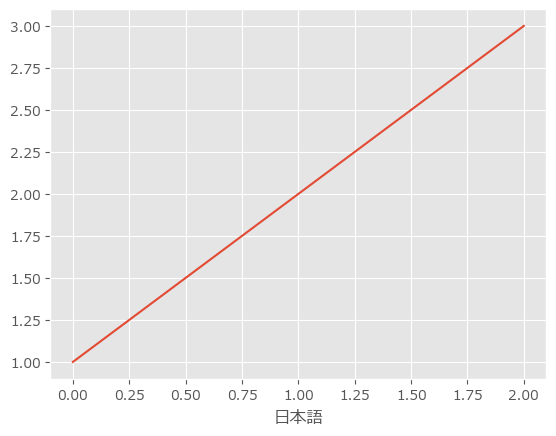

In [34]:
plt.rcParams["font.family"] = "Meiryo"
plt.figure()
plt.plot([1, 2, 3])
plt.xlabel("日本語");

## Artistオブジェクト

matplotlibはオブジェクト指向の描画ライブラリで、3つの階層に分かれています：

* `backend_bases.FigureCanvas`：描画用のキャンバス

* `backend_bases.Renderer`：`FigureCanvas`オブジェクト上に描画する方法を知っている

* `artist.Artist`：`Renderer`を使用して`FigureCanvas`オブジェクト上に描画する方法を知っている

`FigureCanvas`と`Renderer`は、`wxPython`インターフェースライブラリで生成されたインターフェース上に描画するなど、低レベルの描画操作を処理する必要があります。`Artist`オブジェクトは、グラフ、テキスト、曲線などの描画要素の描画とレイアウトを処理する高レベルの構造を扱います。通常、私たちは`Artist`オブジェクトとのみやり取りし、低レベルの描画の詳細を気にする必要はありません。

`Artist`オブジェクトは、単純型とコンテナ型の2種類に分かれます。単純型の`Artist`オブジェクトは、`Line2D`、`Rectangle`、`Text`、`AxesImage`などの標準的な描画要素です。コンテナ型は、複数の`Artist`オブジェクトを含むことができ、それらを1つのまとまりとして組織化します。例えば、`Axis`、`Axes`、`Figure`などがあります。

`Artist`オブジェクトを直接作成して描画する手順は以下の通りです：

* `Figure`オブジェクトを作成する；

* `Figure`オブジェクトに対して1つまたは複数の`Axes`オブジェクトを作成する；

* `Axes`オブジェクトのメソッドを呼び出して、さまざまな単純型の`Artist`オブジェクトを作成する。

以下のプログラムでは、まず`figure()`を呼び出して`Figure`オブジェクトを作成します。`figure()`は`Figure`オブジェクトを作成するためのヘルパー関数で、多くの初期化操作を行うため、直接`Figure()`を使用して作成することは推奨されません。次に、`Figure`オブジェクトの`add_axes()`を呼び出して、その中に`Axes`オブジェクトを作成します。`add_axes()`のパラメータは`[left, bottom, width, height]`の形式のリストで、これらの値は作成される`Axes`オブジェクトの`Figure`オブジェクト内での位置とサイズを指定します。各値の範囲は0から1の間です：

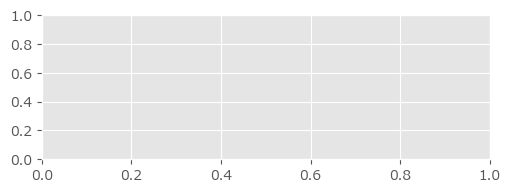

In [35]:
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

次に、`Axes`オブジェクトの`plot()`を呼び出して曲線を描画し、この曲線を表す`Line2D`オブジェクトを返します。

In [36]:
line = ax.plot([1, 2, 3], [1, 2, 1])[0]  # 返されるのは1つの要素を持つリスト
print(line is ax.lines[0])

True


`Axes`オブジェクトの`lines`属性は、すべての曲線を含むリストです。`ax.plot()`を続けて実行すると、作成された`Line2D`オブジェクトがこのリストに追加されます。特定の曲線を削除したい場合は、このリストから直接削除します。

`Axes`オブジェクトには、他にも多くの`Artists`オブジェクトが含まれています。例えば、`set_xlabel()`を使用してX軸のタイトルを設定できます：

In [37]:
ax.set_xlabel("time");

`set_xlabel()`のソースコードを見ると、以下の文で実装されていることがわかります：

    self.xaxis.set_label_text(xlabel)

さらに追跡すると、`Axes`オブジェクトの`xaxis`属性は`XAxis`オブジェクトであり、その`label`属性は`Text`オブジェクトであり、`Text`オブジェクトの`_text`属性が設定した値であることがわかります：

In [38]:
print(ax.xaxis)
print(ax.xaxis.label)
print(ax.xaxis.label._text)

XAxis(96.0,48.0)
Text(0.5, 18.72222222222222, 'time')
time


`Axes`、`XAxis`、`Text`クラスはすべて`Artist`から継承されており、それらの`get_*()`を呼び出して対応する属性値を取得することもできます：

In [39]:
ax.get_xaxis().get_label().get_text()

'time'

### Artistの属性

前述の説明から、グラフ内の各描画要素が`Artist`オブジェクトで表され、各`Artist`オブジェクトにはその表示効果を制御する多くの属性があることがわかります。例えば、`Figure`オブジェクトと`Axes`オブジェクトには、背景として`patch`属性があり、これは`Rectangle`オブジェクトです。その属性を設定することで、グラフの背景色や透明度を変更できます。以下の例では、グラフの背景色を緑色に設定しています：

In [40]:
fig = plt.figure()
fig.patch.set_color("g")  # 背景色を緑色に設定

<Figure size 640x480 with 0 Axes>

コードが単独のプログラムとして実行される場合、`set_color()`を呼び出して背景色を設定しても、すぐにインターフェースに表示されるわけではありません。インターフェースの表示を更新するには、`fig.canvas.draw()`を呼び出す必要があります。

以下は、すべての`Artist`オブジェクトが持ついくつかの属性です：

| 属性  | 説明  |
|:--|:--|
| `alpha`  | 透明度、0から1の間の値、0は完全に透明、1は完全に不透明  |
| `animated`  | ブール値、アニメーション効果を描画する際に使用  |
| `axes`  | この`Artist`オブジェクトを所有する`Axes`オブジェクト、`None`の場合もある  |
| `clip_box`  | オブジェクトのクリッピングボックス  |
| `clip_on`  | クリッピングするかどうか  |
| `clip_path`  | クリッピングのパス  |
| `contains`  | 指定された点がオブジェクト上にあるかどうかを判断する関数  |
| `figure`  | この`Artist`オブジェクトを所有する`Figure`オブジェクト、`None`の場合もある  |
| `label`  | テキストラベル  |
| `picker`  | `Artist`オブジェクトの選択を制御  |
| `transform` | オフセット、回転、スケーリングなどの座標変換を制御 |
| `visible` | 表示するかどうか  |
| `zorder` | 描画順序を制御 |

`Artist`オブジェクトのすべての属性は、対応する`get_*()`および`set_*()`メソッドを使用して読み書きできます。例えば、以下の文は新しく描画された曲線オブジェクトの`alpha`属性を0.5に設定し、半透明にします：

In [41]:
line = plt.plot([1, 2, 3, 2, 1], lw=4)[0]
line.set_alpha(0.5)

`set()`を使用して複数の属性を一度に設定できます：

In [42]:
line.set(alpha=0.5, zorder=2);

前述の`getp()`を使用すると、`Artist`オブジェクトのすべての属性名とその値を簡単に出力できます：

In [43]:
plt.getp(fig.patch)

    agg_filter = None
    alpha = None
    angle = 0.0
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    center = [0.5 0.5]
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    corners = [[0. 0.]  [1. 0.]  [1. 1.]  [0. 1.]]
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (0.0, 0.5, 0.0, 1)
    extents = Bbox(x0=0.0, y0=0.0, x1=640.0, y1=480.0)
    facecolor or fc = (0.0, 0.5, 0.0, 1)
    figure = Figure(640x480)
    fill = True
    gid = None
    hatch = None
    hatch_linewidth = 1.0
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    mouseover = False
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = False
    ske

In [44]:
plt.close("all")

### Figureコンテナ

これで、`Artist`オブジェクトの属性を観察および変更する方法がわかりました。次に、指定された`Artist`オブジェクトを見つける方法を解決します。前述のように、`Artist`オブジェクトにはコンテナ型と単純型の2種類があります。このセクションでは、コンテナ型について詳しく見ていきます。

グラフを構成するさまざまな`Artist`オブジェクトの中で、最上位の`Artist`オブジェクトは`Figure`で、グラフを構成するすべての要素を含んでいます。`add_subplot()`または`add_axes()`メソッドを呼び出してグラフにサブプロットを追加すると、これらのサブプロットは`axes`属性リストに追加され、これらのメソッドは新しく作成された`Axes`オブジェクトを返します。`add_subplot()`と`add_axes()`が返すオブジェクトの型は異なり、それぞれ`AxesSubplot`と`Axes`です。`AxesSubplot`は`Axes`の派生クラスです。

True


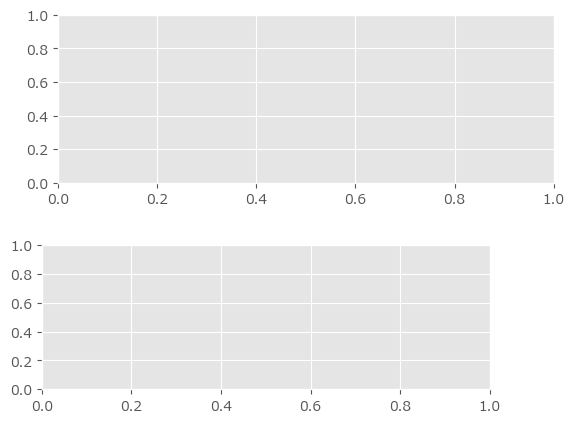

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
print(ax1 in fig.axes and ax2 in fig.axes)

`gca()`などの関数をサポートするために、`Figure`オブジェクトは現在の軸の情報を内部に保持しているため、`axes`属性に対して直接リスト操作を行うことは推奨されません。代わりに、`add_subplot()`、`add_axes()`、`delaxes()`などのメソッドを使用してサブプロットの追加と削除を行うべきです。ただし、`for`ループを使用して`axes`属性の各要素に対して操作を行うことは問題ありません。以下の文は、すべてのサブプロットのグリッド表示を有効にします。

In [46]:
for ax in fig.axes:
    ax.grid(True)

`Figure`オブジェクトは、独自のテキスト、線、画像などの単純型の`Artist`オブジェクトを持つことができます。デフォルトの座標系はピクセル単位ですが、`Artist`オブジェクトの`transform`属性を設定することで、使用する座標系を変更できます。例えば、`Figure`オブジェクトの座標系は、グラフの左下隅を原点`(0,0)`とし、右上隅を`(1,1)`とします。座標変換については、後の章で詳しく説明します。以下のプログラムは、`Figure`オブジェクトを作成し、その中に2本の直線を追加します：

In [47]:
plt.close("all")

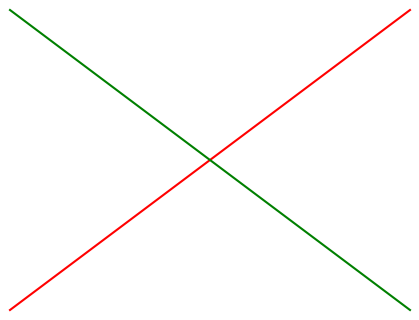

In [48]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(4, 3))
line1 = Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig, color="r")
line2 = Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig, color="g")
fig.lines.extend([line1, line2])

作成した`Line2D`オブジェクトが`Figure`オブジェクトの座標系を使用するように、`Figure`オブジェクトの`transFigure`属性を`Line2D`オブジェクトの`transform`属性に割り当てます。`Line2D`オブジェクトが`Figure`オブジェクト内にあることを認識させるために、その`figure`属性を`fig`に設定します。最後に、これら2つの`Line2D`オブジェクトを`Figure`オブジェクトの`lines`属性リストに追加する必要があります。

以下は、`Figure`オブジェクトに含まれる他の`Artist`オブジェクトの属性です：

| 属性  | 説明  |
|:--|:--|
| `axes`  | `Axes`オブジェクトのリスト  |
| `patch`  | 背景としての`Rectangle`オブジェクト  |
| `images`  | `FigureImage`オブジェクトのリスト  |
| `legends`  | `Legend`オブジェクトのリスト  |
| `lines`  | `Line2D`オブジェクトのリスト  |
| `patches`  | `Patch`オブジェクトのリスト  |
| `texts`  | テキストを表示するための`Text`オブジェクトのリスト |

### Axesコンテナ

`Axes`コンテナ（サブプロット）は、matplotlibのコアであり、グラフを構成する多くの`Artist`オブジェクトを含んでおり、これらのオブジェクトを作成および変更するための多くのメソッド関数を提供しています。`Figure`コンテナと同様に、背景として`patch`属性を持っています。デカルト座標の場合、`patch`属性は`Rectangle`オブジェクトであり、極座標の場合、`patch`属性は`Circle`オブジェクトです。例えば、以下の文は`Axes`オブジェクトの背景色を緑色に設定します：

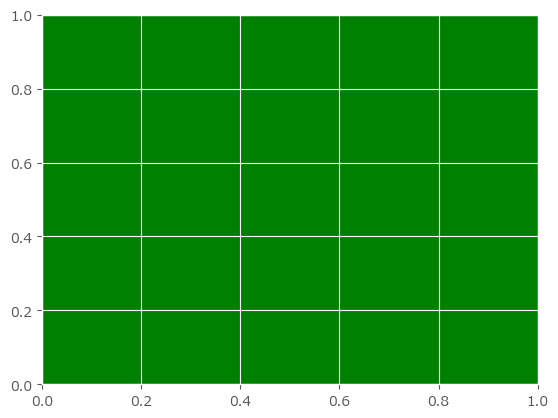

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")

`Axes`オブジェクトの描画メソッド`plot()`を呼び出すと、一連の`Line2D`オブジェクトが作成され、それらが`Axes`オブジェクトの`lines`属性に追加され、最後に作成されたすべての`Line2D`オブジェクトを含むリストが返されます。`plot()`のすべてのキーワード引数は、これらの`Line2D`オブジェクトの属性を設定するために渡されます：

In [50]:
x, y = np.random.rand(2, 100)
line = ax.plot(x, y, "-", color="blue", linewidth=2)[0]
line is ax.lines[0]

True

`plot()`は`Line2D`オブジェクトのリストを返すことに注意してください。なぜなら、複数のX-Y軸データを`plot()`に渡して、複数の曲線を同時に描画できるからです。

`plot()`と同様に、棒グラフを描画する`bar()`関数とヒストグラムを描画する`hist()`関数は、`Patch`オブジェクトのリストを作成します。各要素は実際には`Patch`クラスから派生した`Rectangle`オブジェクトであり、作成された`Patch`オブジェクトはすべて`Axes`オブジェクトの`patches`属性に追加されます：

True

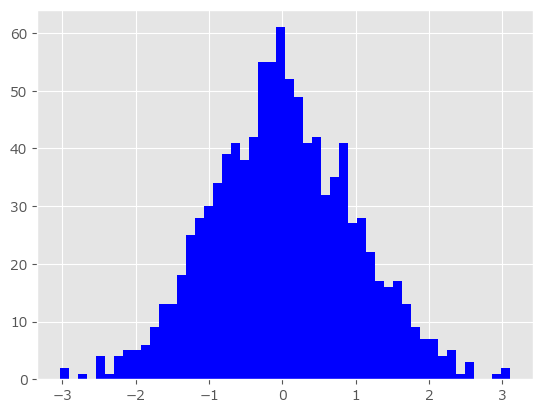

In [51]:
fig, ax = plt.subplots()
n, bins, rects = ax.hist(np.random.randn(1000), 50, facecolor="blue")
rects[0] is ax.patches[0]

通常、`lines`や`patches`属性に対して直接操作を行うことはありません。代わりに、`add_line()`や`add_patch()`などのメソッドを呼び出します。これらのメソッドは、多くの属性の設定作業を支援します。まず、`Axes`オブジェクト`ax`と`Rectangle`オブジェクト`rect`を作成します：

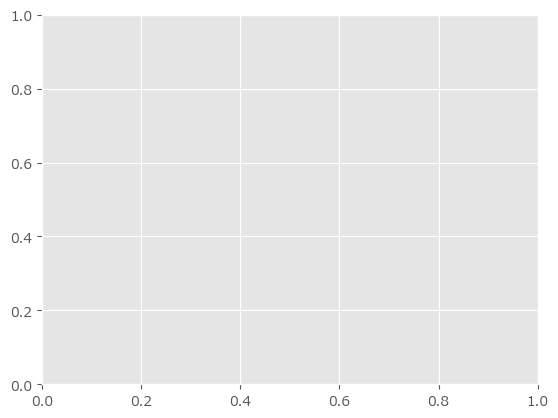

In [52]:
fig, ax = plt.subplots()
rect = plt.Rectangle((1, 1), width=5, height=12)

次に、`add_patch()`を使用して`rect`を`ax`に追加します：

In [53]:
ax.add_patch(rect)  # rectをaxに追加
rect.axes is ax

True

次に、`rect`を完全に表示するために、`ax`の`autoscale_view()`メソッドを呼び出して、X-Y軸の表示範囲を自動調整します：

In [54]:
print(ax.get_xlim())  # axのX軸範囲は0から1で、rectを完全に表示できない
print(ax.dataLim.bounds)  # データの範囲とrectのサイズは一致する
ax.autoscale_view()  # 座標軸の範囲を自動調整
print(ax.get_xlim())  # これでX軸はrectを完全に表示できる

(np.float64(0.0), np.float64(1.0))
(np.float64(1.0), np.float64(1.0), np.float64(5.0), np.float64(12.0))
(np.float64(0.75), np.float64(6.25))


以下に、`Axes`オブジェクトが他の`Artist`オブジェクトを含むことができる属性をリストアップします：

| 属性  | 説明  |
|:--|:--|
| `artists`  | `Artist`オブジェクトのリスト  |
| `patch`  |  `Axes`の背景としての`Patch`オブジェクト、`Rectangle`または`Circle`である可能性があります |
| `collections`  | `Collection`オブジェクトのリスト  |
| `images`  |  `AxesImage`オブジェクトのリスト |
| `legends`  | `Legend`オブジェクトのリスト  |
| `lines`  |  `Line2D`オブジェクトのリスト |
| `patches`  | `Patch`オブジェクトのリスト  |
| `texts`  | `Text`オブジェクトのリスト  |
| `xaxis`  | `XAxis`オブジェクト  |
| `yaxis`  | `YAxis`オブジェクト  |

以下に、`Axes`オブジェクトが他の`Artist`オブジェクトを作成するためのさまざまな方法をリストアップします：

|Axesのメソッド  |   作成されるオブジェクト    | 追加されるリスト     |
|:-----------|:------------------|:-----------------|
|annotate    | Annotate          |  texts           |
|bars        | Rectangle         |  patches         |
|errorbar    | Line2D, Rectangle |  lines,patches   |
|fill        | Polygon           |  patches         |
|hist        | Rectangle         |  patches         |
|imshow      | AxesImage         |  images          |
|legend      | Legend            |  legends         |
|plot        | Line2D            |  lines           |
|scatter     | PolygonCollection |  collections     |
|text        | Text              |  texts           |

例えば、以下のプログラムは`scatter()`を呼び出して散布図を描画し、`PathCollection`オブジェクトを返します。このオブジェクトは`ax.collections`リストに追加されます：

In [55]:
fig, ax = plt.subplots()
t = ax.scatter(np.random.rand(20), np.random.rand(20))
print(t, t in ax.collections)
plt.close("all")

<matplotlib.collections.PathCollection object at 0x0000020903F0A120> True


### Axisコンテナ

`Axis`コンテナには、軸上の目盛り線、目盛りテキスト、グリッド、および軸タイトルなどが含まれます。目盛りには主目盛りと副目盛りがあり、それぞれ`get_major_ticks()`と`get_minor_ticks()`メソッドで取得できます。各目盛り線は`XTick`または`YTick`オブジェクトであり、実際の目盛り線と目盛りテキストを含みます。目盛り線とテキストに簡単にアクセスするために、`Axis`オブジェクトは`get_ticklabels()`と`get_ticklines()`メソッドを提供しています。

まず、サブプロットを作成し、そのX軸オブジェクト`axis`を取得します：

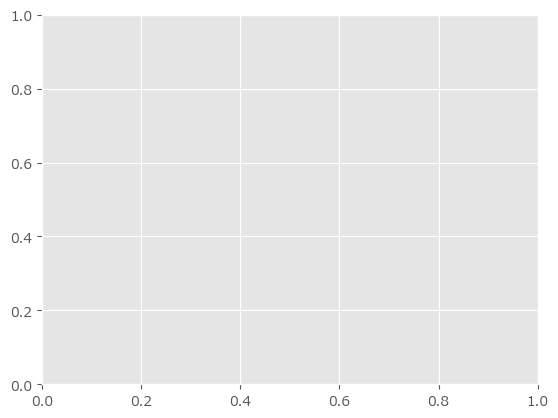

In [56]:
fig, ax = plt.subplots()
axis = ax.xaxis

次に、`axis`オブジェクトの目盛り位置のリストを取得します：

In [57]:
axis.get_ticklocs()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

次に、`axis`オブジェクトの目盛りラベルおよびラベル内のテキストを取得します：

In [58]:
print(axis.get_ticklabels())  # 目盛りラベルのリストを取得
print([x.get_text() for x in axis.get_ticklabels()])  # 目盛りのテキスト文字列を取得

[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']


次に、軸上の主目盛り線のリストを取得します。X軸には12本の目盛り線があり、これらはサブプロットの上下のX軸上のすべての目盛り線です：

In [59]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

また、図には副目盛り線がないため、副目盛り線のリストの長さは0です：

In [60]:
axis.get_ticklines(minor=True)  # 副目盛り線のリストを取得

<a list of 0 Line2D ticklines objects>

目盛り線または目盛りラベルを取得した後、それらのさまざまな属性を設定できます。以下では、目盛り線を緑色の太線に設定し、テキストを赤色にし、45度回転させます。最終的な結果は次のグラフに示されています：

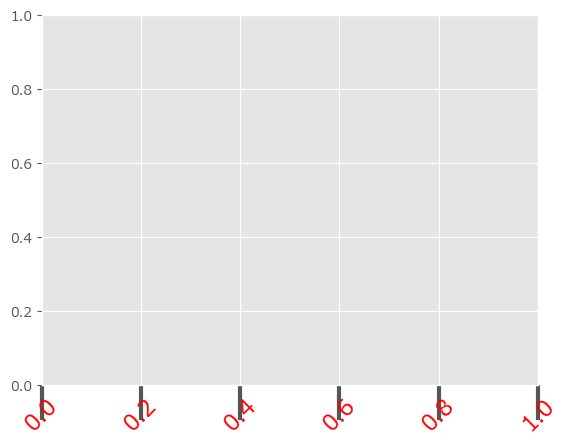

In [61]:
for label in axis.get_ticklabels():
    label.set_color("red")
    label.set_rotation(45)
    label.set_fontsize(16)

for line in axis.get_ticklines():
    line.set_color("green")
    line.set_markersize(25)
    line.set_markeredgewidth(3)
fig

この例は、`Artist`オブジェクトのさまざまな属性をデモンストレーションするためのものです。実際には、`pyplot`モジュールの`xticks()`を使用すると、X軸の目盛りテキストの設定をより迅速に行うことができます。ただし、`xticks()`は目盛りテキストの属性しか設定できず、目盛り線の属性は設定できません。興味のある読者は、IPythonで`plt.xticks??`と入力してそのソースコードを確認できます。

    plt.xticks(fontsize=16, color="red", rotation=45)
    
前の例では、副目盛り線のリストが空でした。これは、副目盛りの位置を計算するオブジェクトがデフォルトで`NullLocator`であり、これが目盛り線を生成しないためです。一方、主目盛りの位置を計算するオブジェクトは`AutoLocator`であり、現在のズームなどの設定に基づいて目盛りの位置を自動的に計算します：

In [62]:
print(axis.get_minor_locator())  # 副目盛りの位置を計算するオブジェクト
print(axis.get_major_locator())  # 主目盛りの位置を計算するオブジェクト

matplotlibは、目盛り線の位置を設定するためのさまざまな`Locator`クラスと、目盛りテキストの表示を制御する`Formatter`クラスを提供しています。以下のプログラムは、X軸の主目盛りを$\pi/4$、副目盛りを$\pi/20$に設定し、主目盛りのテキストを数学記号で$\pi$を表示します。プログラムの出力は次のグラフに示されています。

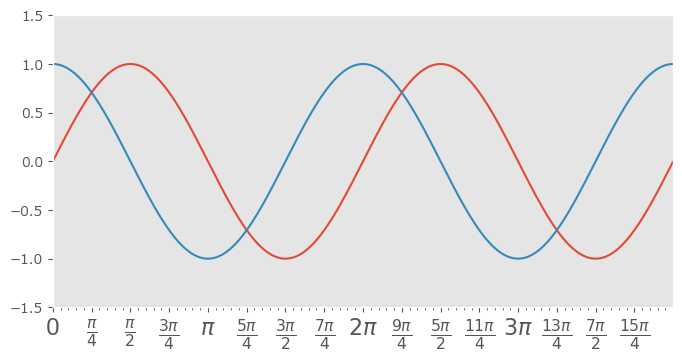

In [63]:
from fractions import Fraction
from matplotlib.ticker import MultipleLocator, FuncFormatter  #❶

x = np.arange(0, 4 * np.pi, 0.01)
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(x, np.sin(x), x, np.cos(x))


def pi_formatter(x, pos):  #❷
    frac = Fraction(int(np.round(x / (np.pi / 4))), 4)
    d, n = frac.denominator, frac.numerator
    if frac == 0:
        return "0"
    elif frac == 1:
        return r"$\pi$"
    elif d == 1:
        return r"${%d} \pi$" % n
    elif n == 1:
        return r"$\frac{\pi}{%d}$" % d
    return r"$\frac{%d \pi}{%d}$" % (n, d)


# 2つの軸の範囲を設定
plt.ylim(-1.5, 1.5)
plt.xlim(0, np.max(x))

# 図の下部の余白を設定
plt.subplots_adjust(bottom=0.15)

plt.grid()  # グリッドを有効にする

# 主目盛りをpi/4に設定
ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))  #❸

# 主目盛りテキストをpi_formatter関数で計算
ax.xaxis.set_major_formatter(FuncFormatter(pi_formatter))  #❹

# 副目盛りをpi/20に設定
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 20))  #❺

# 目盛りテキストのサイズを設定
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)

❶目盛りの位置決めとテキストのフォーマットに関連するクラスは、`matplotlib.ticker`モジュールで定義されています。プログラムは、以下の2つのクラスをロードしています：

* `MultipleLocator`：❸❺指定された値の整数倍で主副目盛り線を配置します。

* `FuncFormatter`：❹指定された関数を使用して目盛りテキストを計算します。この関数には、目盛り値と目盛りのインデックスが引数として渡されます。❷プログラムでは、`pi_formatter()`を使用して目盛り値に対応する目盛りテキストを計算しています。

### Artistオブジェクトの関係

読者が図表内のさまざまな`Artist`オブジェクトの関係を理解しやすくするために、本書は`Artist`オブジェクトの関係図を出力する小さなプログラムを提供しています。

関係図を生成するために、読者はGraphvizの公式ウェブサイトからGraphvizソフトウェアパッケージをダウンロードするか、Graphvizのオンラインエディタを使用できます。以下に例を示します。

以下では、`GraphvizMatplotlib.graphviz()`を呼び出して、`fig`内部の各`Artist`オブジェクトの関係をdotコードとして出力し、`graphvizt`ライブラリでSVG画像に変換します。

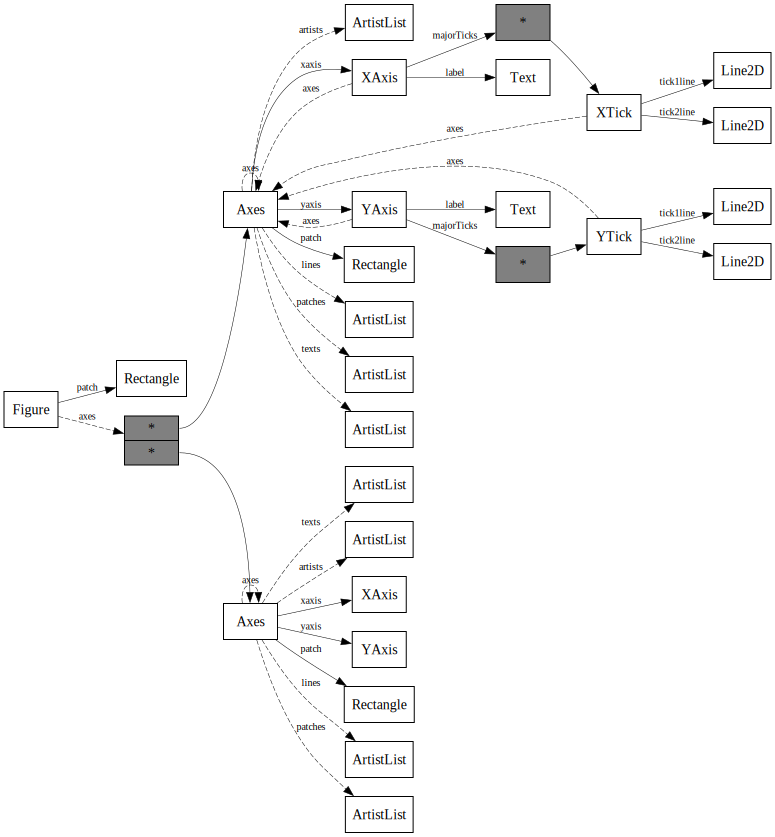

In [64]:
fig = plt.figure()
plt.subplot(211)
plt.bar([1, 2, 3], [1, 2, 3])
plt.subplot(212)
plt.plot([1, 2, 3])

from helper.dot import GraphvizMatplotlib
import graphviz

plt.close(fig)
graphviz.Source(GraphvizMatplotlib.graphviz(fig))

上のグラフでは、灰色で塗りつぶされた四角形がリストを表し、他の四角形がさまざまな`Artist`オブジェクトを表しています。`Artist`オブジェクト間の関係は、矢印付きの細線で表され、細線の横のテキストは属性名です。

例えば、`Figure`四角形から`Rectangle`四角形への矢印は、`Figure`オブジェクトの`patch`属性が`Rectangle`オブジェクトであることを示しています。また、`Figure`オブジェクトの`axes`属性は、2つの要素を持つリストであり、各要素は`AxesSubplot`オブジェクトです。上のグラフを注意深く観察し、IPythonで対応するステートメントを入力して、各`Artist`オブジェクト間の関係を確認してください。